In [2]:
#necessary imports
import xml.etree.ElementTree as ET
import seaborn as sb
import pandas as pd
import matplotlib.pyplot as mp
import requests
from SRC.tools import show, load, fetch
from io import StringIO
import geopandas as gpd


# Matières premières

In [3]:
url_or = "https://bdm.insee.fr/series/sdmx/data/SERIES_BDM/010002100" # URL of the serie

response = requests.get(url_or) # Retrieve XML data
response.raise_for_status() # Checks that the request is successful
xml_content = response.content


root = ET.fromstring(xml_content) # Parse XML content

root = ET.fromstring(xml_content) # Load XML content


data = [] # Initialize a list to store the data


for series in root.findall(".//{*}Series"): # Browse each series

    for obs in series.findall(".//{*}Obs"): # Browse the observation in  each series

        # Extract relevant attributes
        time_period = obs.attrib.get("TIME_PERIOD")
        obs_value = obs.attrib.get("OBS_VALUE")
        # Add the data at the list
        data.append({"TIME_PERIOD": time_period, "OBS_VALUE": obs_value})


df_or = pd.DataFrame(data) # Create a DataFrame from the extracted data


# Convert columns to appropriate types
df_or["TIME_PERIOD"] = pd.to_datetime(df_or["TIME_PERIOD"], format="%Y-%m")
df_or["OBS_VALUE"] = pd.to_numeric(df_or["OBS_VALUE"])

# show the 5 first rows
print(df_or.head())

# Convert TIME_PERIOD to datetime for easier filtering
df_or['TIME_PERIOD'] = pd.to_datetime(df_or['TIME_PERIOD'], format='%Y-%m')

# Filter years between 2013 and 2023
start_date = '2013-01-01'
end_date = '2023-12-31'
df_or = df_or[(df_or['TIME_PERIOD'] >= start_date) & (df_or['TIME_PERIOD'] <= end_date)]

df_or.set_index('TIME_PERIOD', inplace=True) #indexes the years

  TIME_PERIOD  OBS_VALUE
0  2024-11-01      269.6
1  2024-10-01      266.7
2  2024-09-01      249.9
3  2024-08-01      242.5
4  2024-07-01      238.8


In [4]:
url_petrol = "https://bdm.insee.fr/series/sdmx/data/SERIES_BDM/010002091" # URL of the serie

response = requests.get(url_petrol) # Retrieve XML data
response.raise_for_status()   # Checks that the request is successful
xml_content = response.content


root = ET.fromstring(xml_content) # Parse XML content

root = ET.fromstring(xml_content) # Load XML content

# Initialiser une liste pour stocker les données
data = []


for series in root.findall(".//{*}Series"): # Browse each series
   
    for obs in series.findall(".//{*}Obs"):  # Browse the observation in  each series

       # Extract relevant attributes
        time_period = obs.attrib.get("TIME_PERIOD")
        obs_value = obs.attrib.get("OBS_VALUE")
         # Add the data at the list
        data.append({"TIME_PERIOD": time_period, "OBS_VALUE": obs_value})


df_petrol = pd.DataFrame(data)  # Create a DataFrame from the extracted data

# Convert columns to appropriate types
df_petrol["TIME_PERIOD"] = pd.to_datetime(df_petrol["TIME_PERIOD"], format="%Y-%m")
df_petrol["OBS_VALUE"] = pd.to_numeric(df_petrol["OBS_VALUE"])

# show the 5 first rows
print(df_petrol.head())
# Convert TIME_PERIOD to datetime for easier filtering
df_petrol['TIME_PERIOD'] = pd.to_datetime(df_petrol['TIME_PERIOD'], format='%Y-%m')

# Filter years between 2013 and 2023
start_date = '2013-01-01'
end_date = '2023-12-31'
df_petrol = df_petrol[(df_petrol['TIME_PERIOD'] >= start_date) & (df_petrol['TIME_PERIOD'] <= end_date)]

df_petrol.set_index('TIME_PERIOD', inplace=True) #indexes the years

  TIME_PERIOD  OBS_VALUE
0  2024-11-01      115.6
1  2024-10-01      115.0
2  2024-09-01      110.5
3  2024-08-01      121.1
4  2024-07-01      130.2


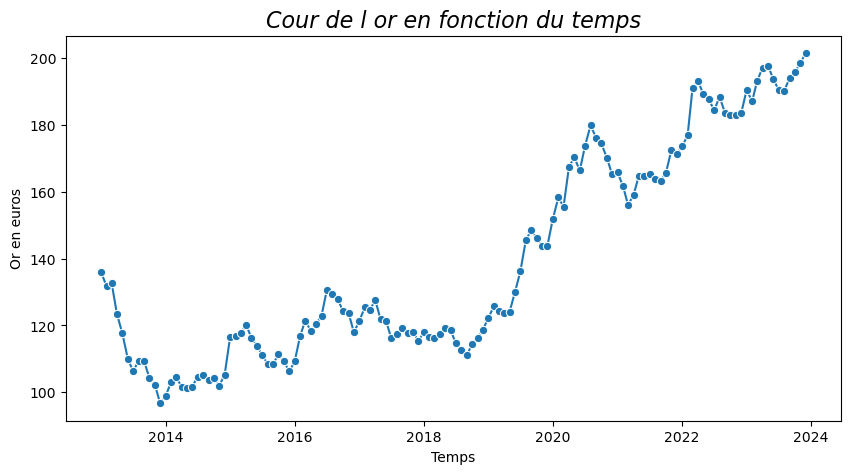

In [5]:
mp.figure(figsize=(10,5))
sb.lineplot(df_or, x='TIME_PERIOD', y='OBS_VALUE', marker='o')
mp.title('Cour de l or en fonction du temps', fontsize=16, style='italic')
mp.xlabel('Temps'); mp.ylabel('Or en euros');

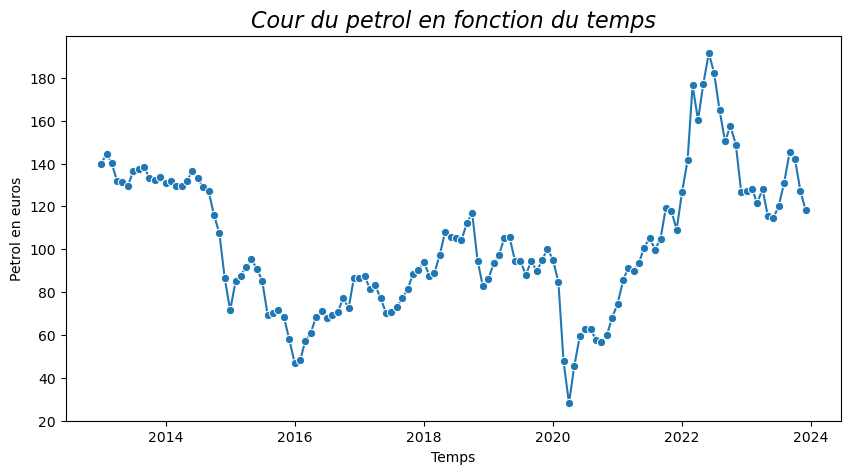

In [6]:
mp.figure(figsize=(10,5))
sb.lineplot(df_petrol, x='TIME_PERIOD', y='OBS_VALUE', marker='o')
mp.title('Cour du petrol en fonction du temps', fontsize=16, style='italic')
mp.xlabel('Temps'); mp.ylabel('Petrol en euros');

# Devises

In [7]:
url_3 ='https://julie-sclaunich.emi.u-bordeaux.fr/DATA/estat_tec00033_filtered_en.csv'
devise = pd.read_csv(url_3) #read and load the DataFrame from a csv file

#delite the unnecessary columns
del devise['DATAFLOW']
del devise['LAST UPDATE']
del devise['freq']
del devise['statinfo']
del devise['unit']
del devise['OBS_FLAG']
devise = devise[ devise['TIME_PERIOD'] > 2012]
devise

devise.set_index('TIME_PERIOD', inplace=True) #indexes the years

print(devise.head() )# show the 5 first rows

                                            currency  OBS_VALUE
TIME_PERIOD                                                    
2013         Bosnia and Herzegovina convertible mark    1.95583
2014         Bosnia and Herzegovina convertible mark    1.95583
2015         Bosnia and Herzegovina convertible mark    1.95583
2016         Bosnia and Herzegovina convertible mark    1.95583
2017         Bosnia and Herzegovina convertible mark    1.95583


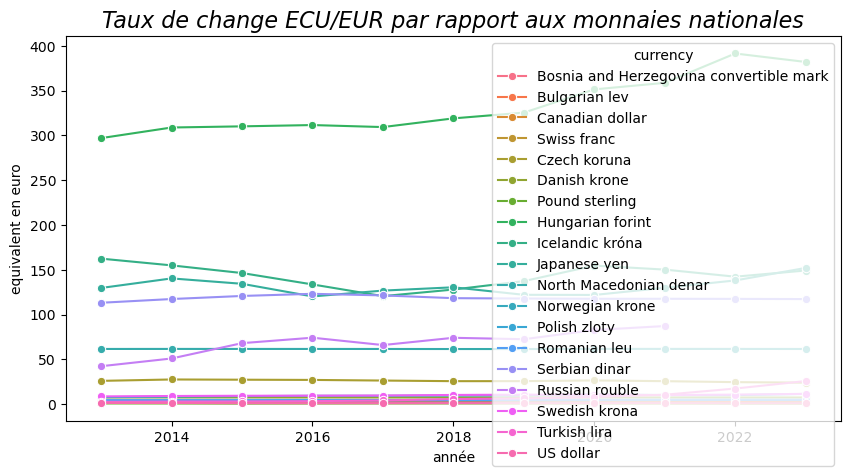

In [8]:
mp.figure(figsize=(10,5)) # les figures 'seaborn' sont en fait des figures 'matplotlib'
sb.lineplot(devise, x='TIME_PERIOD', y='OBS_VALUE', hue='currency', marker='o') # segments de droite + marqueurs
mp.title('Taux de change ECU/EUR par rapport aux monnaies nationales', fontsize=16, style='italic')
mp.xlabel('année'); mp.ylabel('equivalent en euro'); # toujours mettre le titre et les labels en dernier

# Taux d'interets

In [9]:
# Download the XML file from the URL
url = 'https://julie-sclaunich.emi.u-bordeaux.fr/DATA/API_FR.INR.DPST_DS2_fr_xml_v2_52919.xml'
response = requests.get(url)


if response.status_code == 200: # Check if the file was downloaded correctly
    # Save the file locally
    xml_file = 'API_FR.INR.DPST_DS2_fr_xml_v2_52919.xml'
    with open(xml_file, 'wb') as file:
        file.write(response.content)

 # Read and parse the XML file 
    tree = ET.parse(xml_file)
    root = tree.getroot()

   # Extract data
    data = []
    for record in root.findall('.//record'):
        row = {}
        for field in record.findall('field'):
            name = field.attrib.get('name', '')  
            value = field.text  
            row[name] = value
        data.append(row)

    # Convert in DataFrame
    df = pd.DataFrame(data)
  
else:
    print(f"Erreur de téléchargement : {response.status_code}")

del df['Item'] #delite the unnecessary column

european_countries = [
    "Albanie", "Allemagne", "Andorre", "Autriche", "Belgique", "Biélorussie",
    "Bosnie-Herzégovine", "Bulgarie", "Croatie", "Danemark", "Espagne", "Estonie",
    "Finlande", "France", "Grèce", "Hongrie", "Irlande", "Islande", "Italie",
    "Kosovo", "Lettonie", "Liechtenstein", "Lituanie", "Luxembourg", "Malte",
    "Moldavie", "Monaco", "Monténégro", "Norvège", "Pays-Bas", "Pologne",
    "Portugal", "République tchèque", "Roumanie", "Royaume-Uni", "Russie",
    "Saint-Marin", "Serbie", "Slovaquie", "Slovénie", "Suède", "Suisse",
    "Ukraine", "Vatican"
]

df = df[df['Country or Area'].isin(european_countries)] #keep only the european countries

#keep only the years between 2013 and 2023
df['Year'] = pd.to_numeric(df['Year'], errors='coerce')
df = df[df['Year'] >  2012]

df['Value'] = pd.to_numeric(df['Value'], errors='coerce') # Convert column 'Value' to numeric type

df = df.groupby('Country or Area').filter(lambda x: x['Value'].notnull().any()) # Remove countries with all missing values


df['Value'] = df.groupby('Country or Area')['Value'].transform(lambda x: x.interpolate(method='linear')) # Interpolate missing values for each country


print(df.head()) # show the 5 first rows

df.set_index('Year', inplace=True) #indexes the years

df

    Country or Area  Year     Value
373         Albanie  2013  4.164205
374         Albanie  2014  1.914167
375         Albanie  2015  1.393333
376         Albanie  2016  0.830833
377         Albanie  2017  0.766667


,Country or Area,Value
Year,,
2013,Albanie,4.164205
2014,Albanie,1.914167
2015,Albanie,1.393333
2016,Albanie,0.830833
2017,Albanie,0.766667
...,...,...
2019,Kosovo,1.309867
2020,Kosovo,1.309867
2021,Kosovo,1.309867


ERROR 1: PROJ: proj_create_from_database: Open of /opt/local/stow/conda/miniforge3/envs/cremi/share/proj failed


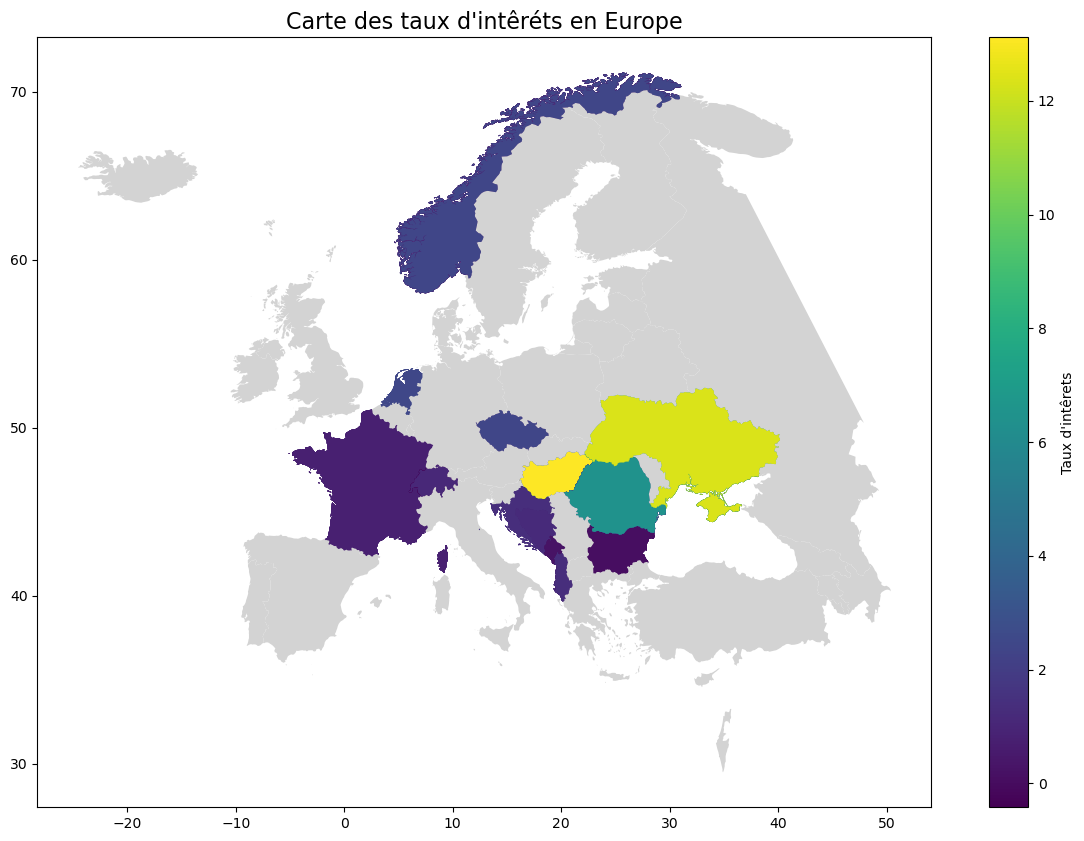

In [10]:
# Define the URL for the GeoJSON file containing European country boundaries
url = "https://raw.githubusercontent.com/leakyMirror/map-of-europe/master/GeoJSON/europe.geojson"
europe = gpd.read_file(url) # Load the GeoJSON file into a GeoDataFrame using GeoPandas


df['Country or Area'] = df['Country or Area'].replace({
    "Albanie": "Albania",
    "Allemagne": "Germany",
    "Andorre": "Andorra",
    "Autriche": "Austria",
    "Belgique": "Belgium",
    "Biélorussie": "Belarus",
    "Bosnie-Herzégovine": "Bosnia and Herzegovina",
    "Bulgarie": "Bulgaria",
    "Croatie": "Croatia",
    "Danemark": "Denmark",
    "Espagne": "Spain",
    "Estonie": "Estonia",
    "Finlande": "Finland",
    "France": "France",
    "Grèce": "Greece",
    "Hongrie": "Hungary",
    "Irlande": "Ireland",
    "Islande": "Iceland",
    "Italie": "Italy",
    "Kosovo": "Kosovo",
    "Lettonie": "Latvia",
    "Liechtenstein": "Liechtenstein",
    "Lituanie": "Lithuania",
    "Luxembourg": "Luxembourg",
    "Malte": "Malta",
    "Moldavie": "Moldova",
    "Monaco": "Monaco",
    "Monténégro": "Montenegro",
    "Norvège": "Norway",
    "Pays-Bas": "Netherlands",
    "Pologne": "Poland",
    "Portugal": "Portugal",
    "République tchèque": "Czech Republic",
    "Roumanie": "Romania",
    "Royaume-Uni": "United Kingdom",
    "Russie": "Russia",
    "Saint-Marin": "San Marino",
    "Serbie": "Serbia",
    "Slovaquie": "Slovakia",
    "Slovénie": "Slovenia",
    "Suède": "Sweden",
    "Suisse": "Switzerland",
    "Ukraine": "Ukraine",
    "Vatican": "Vatican City"
})



europe = europe.merge(df, left_on='NAME', right_on='Country or Area', how='left') # Merge GeoJSON data with DataFrame


import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 1, figsize=(15, 10))

europe.plot(column='Value', ax=ax, legend=True, cmap='viridis', missing_kwds={"color": "lightgrey"},legend_kwds={'label': "Taux d'intêrets"})

plt.title("Carte des taux d'intêréts en Europe", fontsize=16)
plt.show()



PIB

In [11]:
# Download the XML file from the URL
url = 'https://julie-sclaunich.emi.u-bordeaux.fr/DATA/API_NY.GDP.MKTP.CD_DS2_fr_xml_v2_38351.xml'
response = requests.get(url)


if response.status_code == 200: # Check if the file was downloaded correctly
    # Save the file locally
    xml_file = 'API_FR.INR.DPST_DS2_fr_xml_v2_52919.xml'
    with open(xml_file, 'wb') as file:
        file.write(response.content)

 # Read and parse the XML file 
    tree = ET.parse(xml_file)
    root = tree.getroot()

   # Extract data
    data = []
    for record in root.findall('.//record'):
        row = {}
        for field in record.findall('field'):
            name = field.attrib.get('name', '')  
            value = field.text  
            row[name] = value
        data.append(row)

    # Convert in DataFrame
    pib = pd.DataFrame(data)
  
else:
    print(f"Erreur de téléchargement : {response.status_code}")
  
pib = pib.drop(pib.columns[1], axis=1) #delete  unnecessary colomn
#keep only the years between 2013 and 2023
pib['Year'] = pd.to_numeric(pib['Year'], errors='coerce')
pib = pib[pib['Year'] >  2012]


european_countries = [
    "Albanie", "Allemagne", "Andorre", "Autriche", "Belgique", "Biélorussie",
    "Bosnie-Herzégovine", "Bulgarie", "Croatie", "Danemark", "Espagne", "Estonie",
    "Finlande", "France", "Grèce", "Hongrie", "Irlande", "Islande", "Italie",
    "Kosovo", "Lettonie", "Liechtenstein", "Lituanie", "Luxembourg", "Malte",
    "Moldavie", "Monaco", "Monténégro", "Norvège", "Pays-Bas", "Pologne",
    "Portugal", "République tchèque", "Roumanie", "Royaume-Uni", "Russie",
    "Saint-Marin", "Serbie", "Slovaquie", "Slovénie", "Suède", "Suisse",
    "Ukraine", "Vatican"
]

pib = pib[pib['Country or Area'].isin(european_countries)] #keep only the european countries

pib['Value'] = pd.to_numeric(pib['Value'], errors='coerce') # Convert column 'Value' to numeric type

pib = pib.groupby('Country or Area').filter(lambda x: x['Value'].notnull().any()) # Remove countries with all missing values


pib['Value'] = pib.groupby('Country or Area')['Value'].transform(lambda x: x.interpolate(method='linear')) # Interpolate missing values for each country



pib.set_index('Year', inplace=True) #indexes the years
print(pib.head()) # print the 5 first rows

     Country or Area         Value
Year                              
2013         Albanie  1.277622e+10
2014         Albanie  1.322815e+10
2015         Albanie  1.138685e+10
2016         Albanie  1.186120e+10
2017         Albanie  1.301973e+10


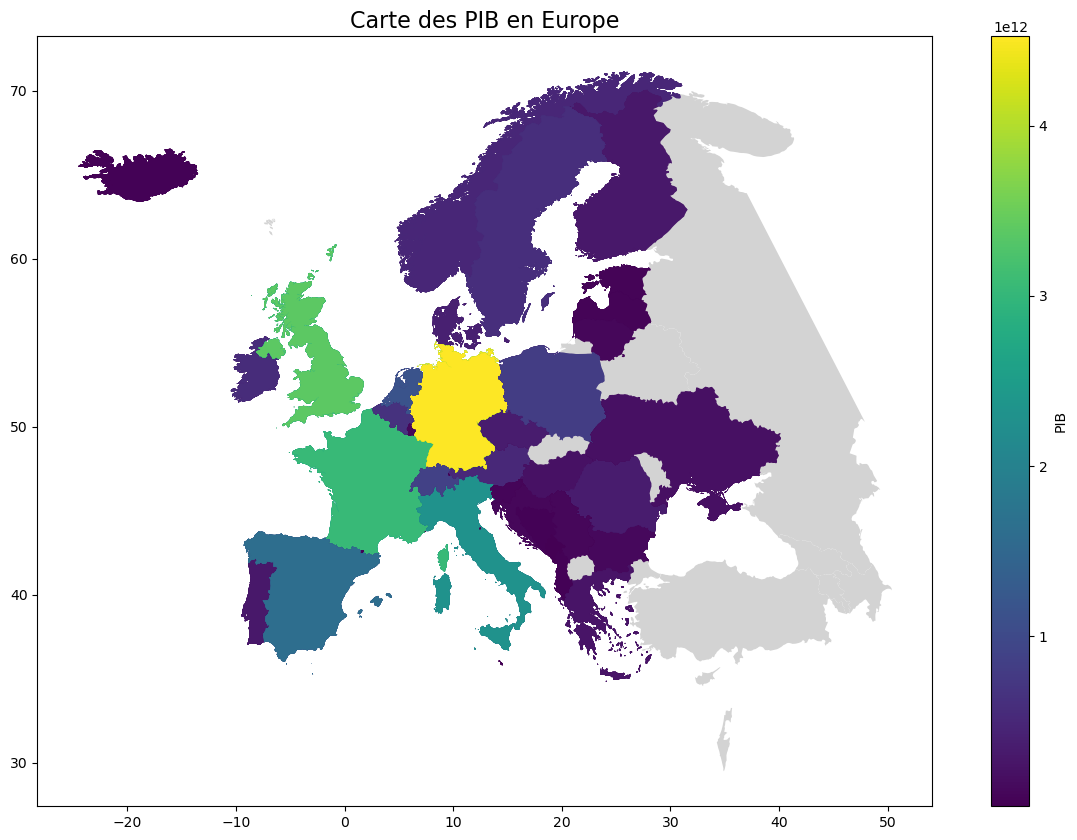

In [12]:
# Define the URL for the GeoJSON file containing European country boundaries
url = "https://raw.githubusercontent.com/leakyMirror/map-of-europe/master/GeoJSON/europe.geojson"
europe = gpd.read_file(url) # Load the GeoJSON file into a GeoDataFrame using GeoPandas


pib['Country or Area'] = pib['Country or Area'].replace({
    "Albanie": "Albania",
    "Allemagne": "Germany",
    "Andorre": "Andorra",
    "Autriche": "Austria",
    "Belgique": "Belgium",
    "Biélorussie": "Belarus",
    "Bosnie-Herzégovine": "Bosnia and Herzegovina",
    "Bulgarie": "Bulgaria",
    "Croatie": "Croatia",
    "Danemark": "Denmark",
    "Espagne": "Spain",
    "Estonie": "Estonia",
    "Finlande": "Finland",
    "France": "France",
    "Grèce": "Greece",
    "Hongrie": "Hungary",
    "Irlande": "Ireland",
    "Islande": "Iceland",
    "Italie": "Italy",
    "Kosovo": "Kosovo",
    "Lettonie": "Latvia",
    "Liechtenstein": "Liechtenstein",
    "Lituanie": "Lithuania",
    "Luxembourg": "Luxembourg",
    "Malte": "Malta",
    "Moldavie": "Moldova",
    "Monaco": "Monaco",
    "Monténégro": "Montenegro",
    "Norvège": "Norway",
    "Pays-Bas": "Netherlands",
    "Pologne": "Poland",
    "Portugal": "Portugal",
    "République tchèque": "Czech Republic",
    "Roumanie": "Romania",
    "Royaume-Uni": "United Kingdom",
    "Russie": "Russia",
    "Saint-Marin": "San Marino",
    "Serbie": "Serbia",
    "Slovaquie": "Slovakia",
    "Slovénie": "Slovenia",
    "Suède": "Sweden",
    "Suisse": "Switzerland",
    "Ukraine": "Ukraine",
    "Vatican": "Vatican City"
})



europe = europe.merge(pib, left_on='NAME', right_on='Country or Area', how='left') # Merge GeoJSON data with DataFrame


import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 1, figsize=(15, 10))

europe.plot(column='Value', ax=ax, legend=True, cmap='viridis', missing_kwds={"color": "lightgrey"},legend_kwds={'label': "PIB"})

plt.title("Carte des PIB en Europe", fontsize=16)
plt.show()